## Problem Statement

An education company named X Education sells online courses to industry professionals. After the marketing efforts through various channels like website and several search engines, the company receives the leads with lead details but the lead conversion rate is only around 30%. To improve the lead conversion the company wishes to identify Hot Leads and focus more on communicating with the potential leads rather than making efforts through calls or emails to everyone.

To help them select the most promising leads, we are required to build a scientific approach or model to assign a score to each of the lead so that X Education can spend time and efforts on communicating with customers having higher chance of conversion.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Building Model__
    
* __Step 6: Model Evaluation__
* __Step 7: Lead Scoring__


### Step 1: Importing the Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn import metrics

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [2]:
leads = pd.read_csv('Leads.csv')

In [3]:
leads.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


In [4]:
leads.shape

(9240, 37)

In [5]:
#duplicate rows check
(leads['Prospect ID'].value_counts()==1).sum()

9240

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 3: Data Cleaning

Null value treatment and outlier treatment is done to improve the Data quality and predictive power of the model.

In [8]:
null_percent = round((leads.isnull().sum()/leads.shape[0])*100,2)
null_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
leads['Specialization'] = leads['Specialization'].apply(lambda x : np.NaN if x == 'Select' else x)
leads['City'] = leads['City'].apply(lambda x : np.NaN if x == 'Select' else x)
leads['Lead Profile'] = leads['Lead Profile'].apply(lambda x : np.NaN if x == 'Select' else x)
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].apply(lambda x : np.NaN if x == 'Select' else x)

In [10]:
null_percent = round((leads.isnull().sum()/leads.shape[0])*100,2)
null_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
drop_col = list(null_percent[null_percent.values>45].index)
drop_col

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [12]:
leads.drop(drop_col,axis = 1,inplace = True)

In [13]:
null_percent = round((leads.isnull().sum()/leads.shape[0])*100,2)
null_percent

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
rem_col = list(null_percent[null_percent.values>0].index)
rem_col

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City']

In [15]:
for x in rem_col:
    leads[x] = leads[x].fillna(leads[x].mode()[0])
    

In [16]:
null_percent = round((leads.isnull().sum()/leads.shape[0])*100,2)
null_percent

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [17]:
categorical = leads.select_dtypes(include =[np.object])
print("Categorical Features of leads Set:",categorical.shape[1])
#numerical features
numerical = leads.select_dtypes(include = [np.int64,np.float64])
print("Numerical Features of Leads Set:",numerical.shape[1])

Categorical Features of leads Set: 25
Numerical Features of Leads Set: 5


__3.1 TotalVisits__

<AxesSubplot:xlabel='TotalVisits'>

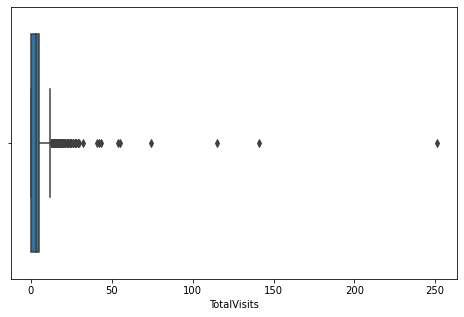

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot('TotalVisits',data=leads)

__3.2 Total Time Spent on Website__

<AxesSubplot:xlabel='Total Time Spent on Website'>

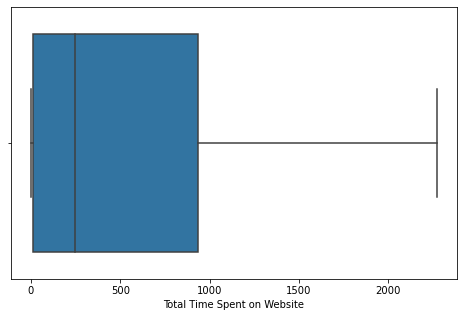

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot('Total Time Spent on Website',data=leads)

__3.3 Page Views Per Visit__

<AxesSubplot:xlabel='Page Views Per Visit'>

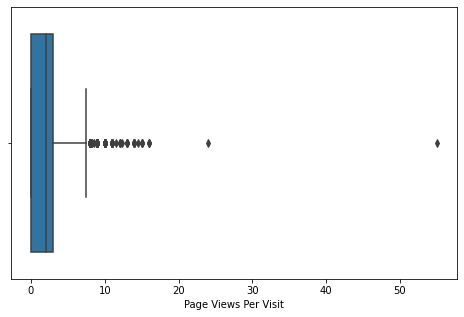

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot('Page Views Per Visit',data=leads)

__3.6 Outlier Check using quantiles__

In [21]:
leads.quantile(q=[0.1,0.25,0.5,0.75,0.8,0.9,0.99,1],axis = 0)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0.10,586361.70,0.0,0.0,0.00,0.0
0.25,596484.50,0.0,0.0,12.00,0.0
0.50,615479.00,0.0,3.0,248.00,2.0
0.75,637387.25,1.0,5.0,936.00,3.0
0.80,641577.60,1.0,5.0,1087.20,4.0
0.90,650506.10,1.0,7.0,1380.00,5.0
0.99,659592.98,1.0,17.0,1840.61,9.0
1.00,660737.00,1.0,251.0,2272.00,55.0


__only two numerical columns Page Views Per Visit and TotalVisits have outliers and remaining numerical columns are increasing steadily__

In [22]:
leads[(leads['TotalVisits']>17)].shape

(83, 30)

In [23]:
leads[(leads['Page Views Per Visit']>9)].shape

(75, 30)

__since the outliers are beyond 0.99 quantile and are very few we can impute the outliers with median values in columns TotalVisits and Page Views Per Visit__

In [24]:
mode1 = leads['TotalVisits'].mode()[0]
mode1

0.0

In [25]:
leads['TotalVisits'] = leads['TotalVisits'].apply(lambda x : mode1 if x > 10 else x)

In [26]:
mode2 = leads['Page Views Per Visit'].mode()[0]

In [27]:
mode2

0.0

In [28]:
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].apply(lambda x : mode2 if x > 7.5 else x)

__Outliers have been treated with mode values as the number of outliers are significantly less and we can see in quantiles__

In [29]:
leads.quantile(q=[0.1,0.25,0.5,0.75,0.8,0.9,0.99,1],axis = 0)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0.10,586361.70,0.0,0.0,0.00,0.0
0.25,596484.50,0.0,0.0,12.00,0.0
0.50,615479.00,0.0,2.0,248.00,2.0
0.75,637387.25,1.0,4.0,936.00,3.0
0.80,641577.60,1.0,5.0,1087.20,4.0
0.90,650506.10,1.0,6.0,1380.00,5.0
0.99,659592.98,1.0,10.0,1840.61,7.0
1.00,660737.00,1.0,10.0,2272.00,7.5


### Step 4: Exploratory Data Analysis

we split the leads into non-converted leads and converted leads indicated as leads0 and leads1

__4.1 Univariate Analysis__

<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

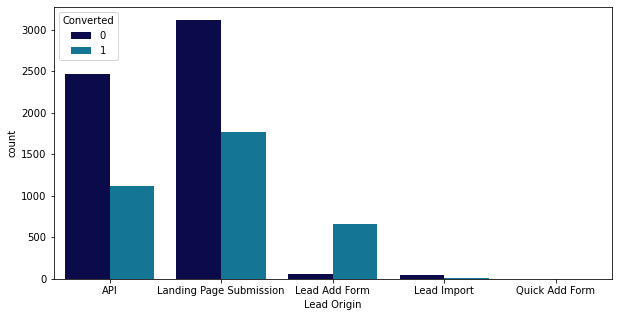

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Lead Origin', hue = 'Converted', data=leads, palette='ocean')

__above plot shows lead_add form have higher chances of conversion__

<AxesSubplot:xlabel='Lead Source', ylabel='count'>

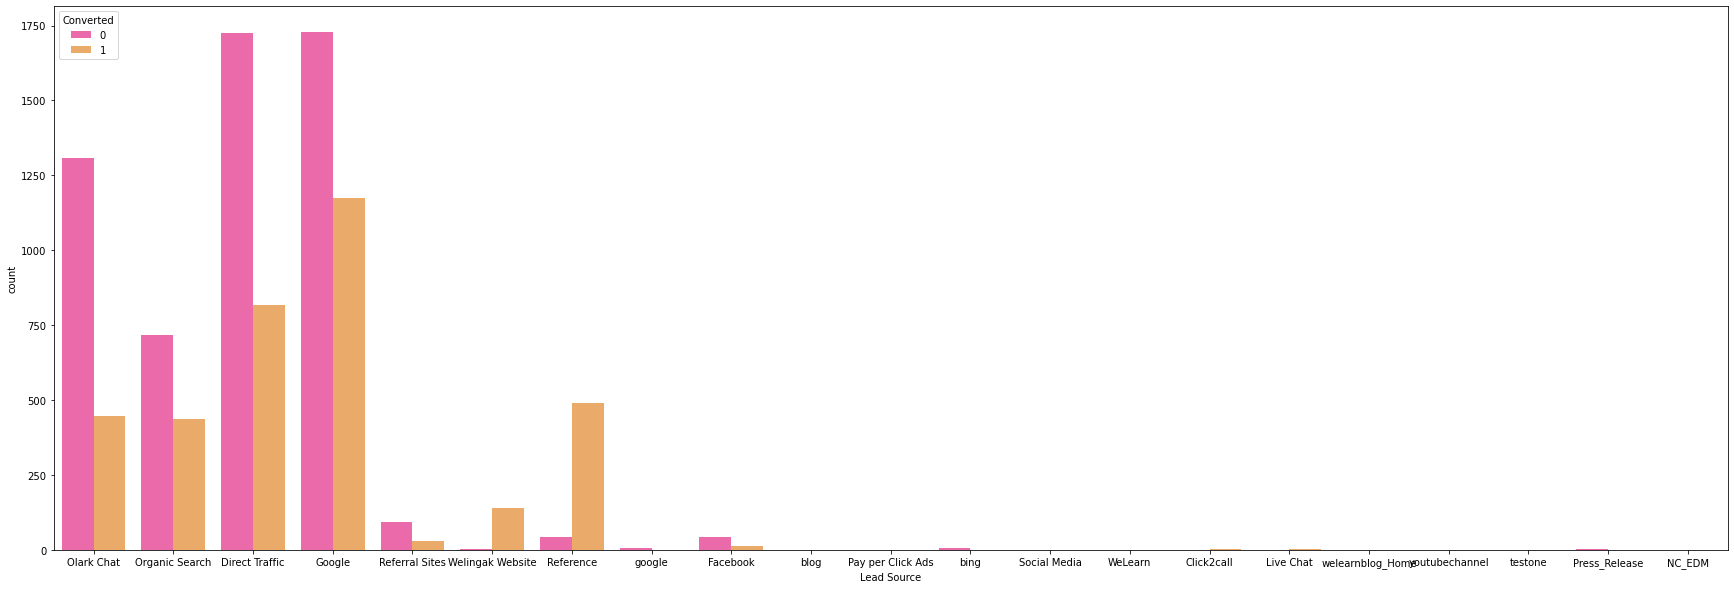

In [31]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'Lead Source', hue = 'Converted', data=leads,palette='spring') 

__Above plot shows that Google,Direct traffic,organic search and olark char are the major sources of leads and to increase more leads from these channels we should focus on these channels__

<AxesSubplot:xlabel='Last Activity', ylabel='count'>

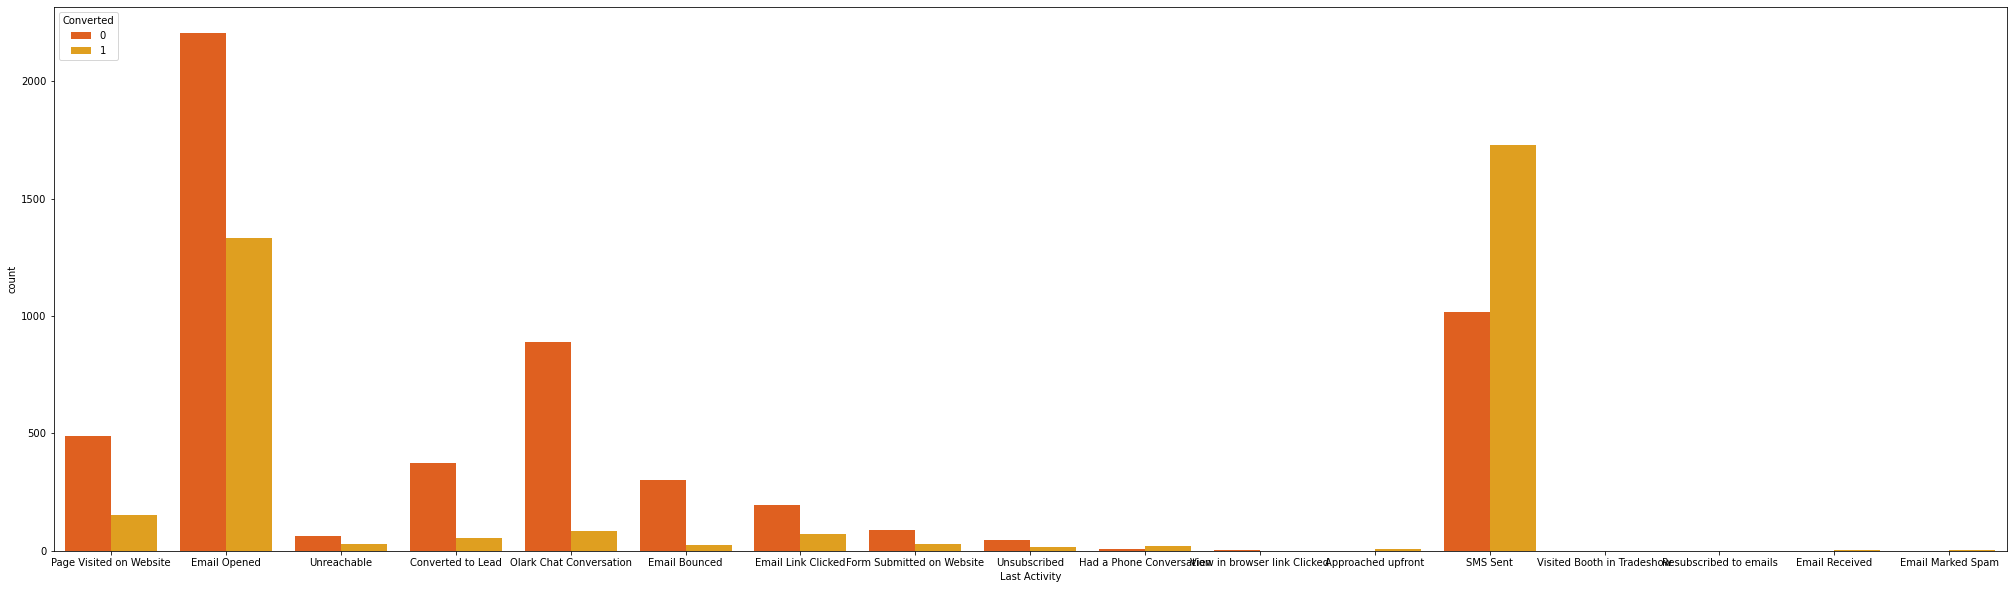

In [32]:
plt.figure(figsize=(35,10))
sns.countplot(x = 'Last Activity', hue = 'Converted', data=leads,palette='autumn')

<AxesSubplot:xlabel='What is your current occupation', ylabel='count'>

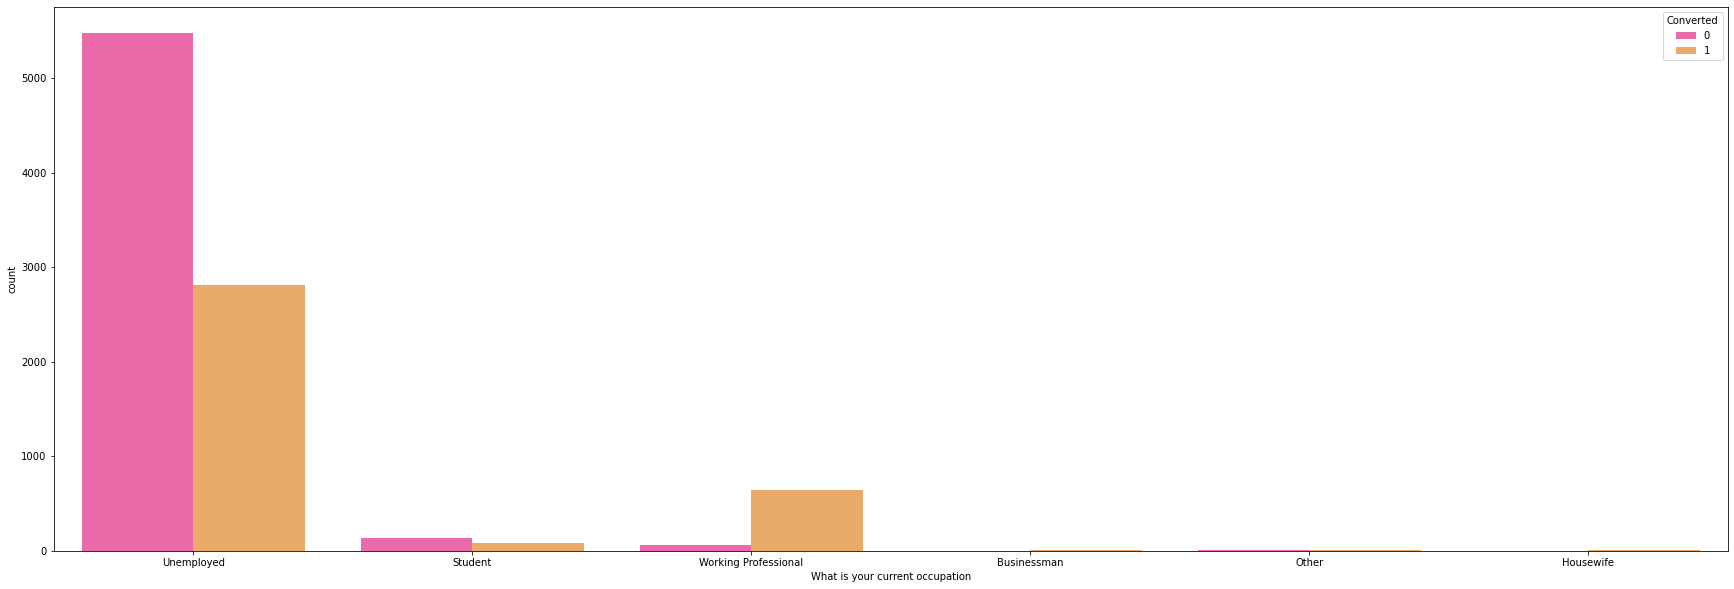

In [33]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data=leads,palette='spring')

__Above analysis shows us that working professional are opting for X education as the conversion is positive__

<AxesSubplot:xlabel='Last Notable Activity', ylabel='count'>

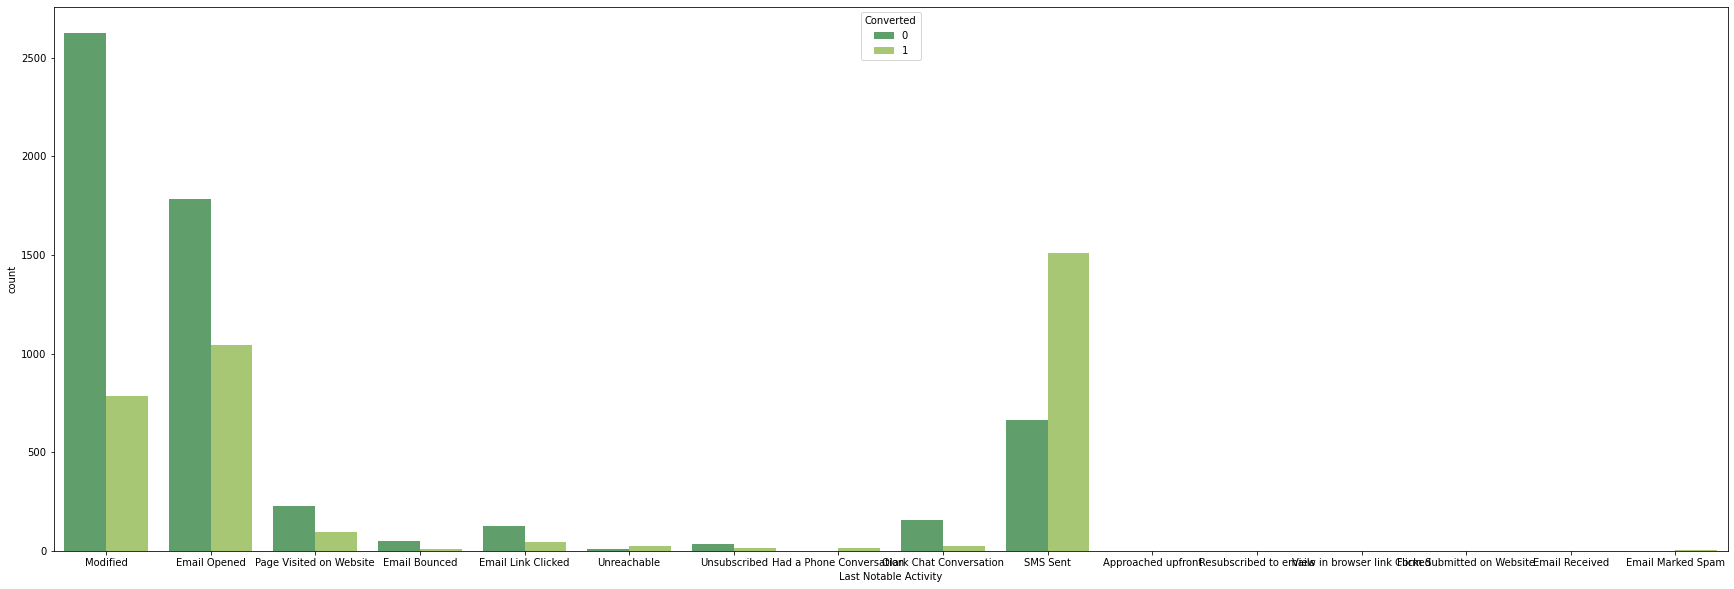

In [34]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'Last Notable Activity', hue = 'Converted', data=leads,palette='summer')

__Last Notable Activity 'SMS Sent' is high for converted leads__

## Bivariate Analysis

<AxesSubplot:>

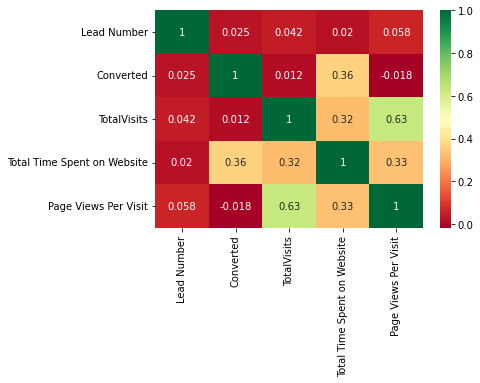

In [35]:
# Numerical Columns
sns.heatmap(leads.corr(),annot = True,cmap = 'RdYlGn')

__In the above numerical columns there is high correlation of 0.63 between TotalVisits and Pageviews per visit__

In [36]:
## Binary Mapping

__Converting Some binary variables with values Yes/No to 1/0__

In [37]:
binary_list = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
binary_list

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [38]:
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

leads[binary_list] = leads[binary_list].apply(binary_map)

In [39]:
leads = leads.drop('Prospect ID',axis = 1)

In [40]:
categorical = leads.select_dtypes(include =[np.object])
print("Categorical Features of leads Set:",categorical.shape[1])
#numerical features
numerical = leads.select_dtypes(include = [np.int64,np.float64])
print("Numerical Features of Leads Set:",numerical.shape[1])

Categorical Features of leads Set: 10
Numerical Features of Leads Set: 19


In [41]:
# We create a list for categorical columns which we need to drop after dummy variable creation
duplicate_col = categorical.columns
duplicate_col

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [42]:
dummy_var = pd.get_dummies(leads[categorical.columns],drop_first = True)

In [43]:
leads = pd.concat([leads,dummy_var],axis = 1)

In [44]:
leads.drop(duplicate_col,axis = 1, inplace= True)

In [45]:
leads.drop('Lead Number',axis = 1,inplace = True)

### Step 5 :Building a Model

* __In the X- Education leads Data set, the Target variable is 'Converted' and it is a binary column having values {0,1} '0' indicating non-converted leads and 1 indicating converted leads, so we build a logistic regression model to predict a binary class variable__

In [46]:
y = leads.pop('Converted')

In [47]:
X = leads
X

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,0,8.0,1845,2.67,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,0,2.0,238,2.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,2.0,199,2.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,0,0,3.0,499,3.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size=0.3,random_state = 100)

__5.1 Scaling the numerical variables using Standard Scaler__ 

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
scaling_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [51]:
X_train[scaling_var] = scaler.fit_transform(X_train[scaling_var])

In [52]:
X_train.drop(['Last Notable Activity_View in browser link Clicked'],axis = 1,inplace = True)

In [53]:
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression()

__Using Recursive Feature Elimination technique we do a coarse slection of Top 15 variables for our Analysis__

In [54]:
from sklearn.feature_selection import RFE
rfe = RFE(logit_reg,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [55]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False,  True, False,
        True,  True,

In [56]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

__Since we did a coarse selection of features by using RFE and now we do fine selection of features for that we need statsmodels and we analyse the p-values for finding the significance of variables and VIF for keeping the variance inflation factor around 5__

In [57]:
import statsmodels.api as sm

In [58]:
X_train_sm = sm.add_constant(X_train[col])

In [59]:
logit1 = sm.GLM(y_train ,X_train_sm,family = sm.families.Binomial())

In [60]:
logit_model1 = logit1.fit()

In [61]:
logit_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.8
Date:                Tue, 09 Aug 2022   Deviance:                       4147.6
Time:                        21:27:55   Pearson chi2:                 1.16e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0978      0.208    -19.689      0.000      -4.506      -3.690
Do Not Email                                            -1.4320      0.171     -8.354      0.000      -1.768      -1.096
Lead Origin_Lead Add Form                                2.4038      0.213     11.271      0.000       1.986       2.822
Last Activity_Olark Chat Conversation                   -1.7036      0.164    -10.377      0.000      -2.025      -1.382
What is your current occupation_Working Professional     2.8980      0.232     12.509      0.000       2.444       3.352
Tags_Busy                                                3.0193      0.298     10.141      0.000       2.436       3.603
Tags_Closed by Horizzon                                  8.7506      1.027      8.520      0.000       6.738      10.764
Tags_Interested in Next batch                           24.4030      2e+04      0.001      0.999   -3.91e+04    3.92e+04
Tags_Lateral student                                    25.8717   2.29e+04      0.001      0.999   -4.48e+04    4.49e+04
Tags_Lost to EINS                                        8.2410      0.750     10.986      0.000       6.771       9.711
Tags_Ringing                                            -1.1039      0.305     -3.622      0.000      -1.701      -0.507
Tags_Will revert after reading the email                 3.5918      0.209     17.168      0.000       3.182       4.002
Tags_in touch with EINS                                  2.9423      0.763      3.858      0.000       1.448       4.437
Tags_switched off                                       -1.2705      0.555     -2.290      0.022      -2.358      -0.183
Last Notable Activity_Had a Phone Conversation           3.5546      1.312      2.709      0.007       0.983       6.127
Last Notable Activity_SMS Sent                           2.4830      0.109     22.757      0.000       2.269       2.697
========================================================================================================================
"""

In [62]:
# we drop Tags_lateral student variable because Tags_interested in next batch seems to be more interpetable by business 
col = col.drop('Tags_Lateral student')
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

__After dropping a variable we build the second model__

In [63]:
X_train_sm = sm.add_constant(X_train[col])
logit2 = sm.GLM(y_train ,X_train_sm,family = sm.families.Binomial())
logit_model2 = logit2.fit()
logit_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2082.3
Date:                Tue, 09 Aug 2022   Deviance:                       4164.6
Time:                        21:27:55   Pearson chi2:                 1.16e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0051      0.200    -20.018      0.000      -4.397      -3.613
Do Not Email                                            -1.4352      0.171     -8.381      0.000      -1.771      -1.100
Lead Origin_Lead Add Form                                2.4128      0.213     11.342      0.000       1.996       2.830
Last Activity_Olark Chat Conversation                   -1.7054      0.164    -10.394      0.000      -2.027      -1.384
What is your current occupation_Working Professional     2.8789      0.230     12.535      0.000       2.429       3.329
Tags_Busy                                                2.9285      0.292     10.027      0.000       2.356       3.501
Tags_Closed by Horizzon                                  8.6576      1.025      8.443      0.000       6.648      10.667
Tags_Interested in Next batch                           23.3148   1.21e+04      0.002      0.998   -2.37e+04    2.37e+04
Tags_Lost to EINS                                        8.1489      0.748     10.895      0.000       6.683       9.615
Tags_Ringing                                            -1.1940      0.299     -3.991      0.000      -1.780      -0.608
Tags_Will revert after reading the email                 3.5002      0.201     17.394      0.000       3.106       3.895
Tags_in touch with EINS                                  2.8500      0.760      3.749      0.000       1.360       4.340
Tags_switched off                                       -1.3590      0.552     -2.463      0.014      -2.440      -0.278
Last Notable Activity_Had a Phone Conversation           3.5174      1.295      2.715      0.007       0.978       6.056
Last Notable Activity_SMS Sent                           2.4790      0.109     22.799      0.000       2.266       2.692
========================================================================================================================
"""

In [64]:
# we drop Tags_interested in next batch as well because the significance level has not improved from its p- value
col = col.drop('Tags_Interested in Next batch')
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

__We rebuild the Third model__

In [65]:
X_train_sm = sm.add_constant(X_train[col])
logit3 = sm.GLM(y_train ,X_train_sm,family = sm.families.Binomial())
logit_model3 = logit3.fit()
logit_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2090.5
Date:                Tue, 09 Aug 2022   Deviance:                       4181.1
Time:                        21:27:55   Pearson chi2:                 1.14e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8818      0.188    -20.594      0.000      -4.251      -3.512
Do Not Email                                            -1.4143      0.170     -8.306      0.000      -1.748      -1.081
Lead Origin_Lead Add Form                                2.4157      0.212     11.395      0.000       2.000       2.831
Last Activity_Olark Chat Conversation                   -1.7018      0.164    -10.380      0.000      -2.023      -1.380
What is your current occupation_Working Professional     2.8545      0.227     12.575      0.000       2.410       3.299
Tags_Busy                                                2.7904      0.285      9.806      0.000       2.233       3.348
Tags_Closed by Horizzon                                  8.5334      1.023      8.340      0.000       6.528      10.539
Tags_Lost to EINS                                        8.0240      0.745     10.772      0.000       6.564       9.484
Tags_Ringing                                            -1.3429      0.291     -4.611      0.000      -1.914      -0.772
Tags_Will revert after reading the email                 3.3717      0.190     17.778      0.000       3.000       3.743
Tags_in touch with EINS                                  2.7239      0.758      3.592      0.000       1.238       4.210
Tags_switched off                                       -1.5079      0.548     -2.754      0.006      -2.581      -0.435
Last Notable Activity_Had a Phone Conversation           3.4726      1.273      2.728      0.006       0.978       5.968
Last Notable Activity_SMS Sent                           2.5090      0.109     23.031      0.000       2.295       2.722
========================================================================================================================
"""

__Now All the above features have significant p-values so we do not drop any furthur columns__

In [66]:
# We check for multicollinearity between variables using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
vif = pd.DataFrame()

vif['features'] = X_train_sm.columns
vif['vif'] = [variance_inflation_factor(X_train_sm.values,i) for i in range(0,X_train_sm.shape[1])]
vif = vif.sort_values(by = 'vif',ascending = False)
vif

,features,vif
0,const,6.128651
9,Tags_Will revert after reading the email,1.873031
8,Tags_Ringing,1.575313
6,Tags_Closed by Horizzon,1.364268
2,Lead Origin_Lead Add Form,1.201378
13,Last Notable Activity_SMS Sent,1.157102
11,Tags_switched off,1.147691
5,Tags_Busy,1.113735
4,What is your current occupation_Working Profes...,1.092352
7,Tags_Lost to EINS,1.085516


__All the above VIF's are < 5 which indicates all the features are non collinear, now we stop the model building process__

In [68]:
y_train_pred = logit_model3.predict(X_train_sm)
y_train_pred

1871    0.005354
6795    0.375188
3516    0.005354
8105    0.062056
3934    0.375188
          ...   
350     0.870530
79      0.991508
8039    0.375188
6936    0.020198
5640    0.375188
Length: 6468, dtype: float64

In [69]:
y_train_pred = logit_model3.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.00535355, 0.37518844, 0.00535355, ..., 0.37518844, 0.02019793,
       0.37518844])

__Here we got the probabilities for the 'converted' column based on the features that we used for model building using logistic regression algorithm. This logistic algorithm assigns the probabilities for the leads and we use them to recommend high probability leads to X Education__

In [70]:
y_train.values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [71]:
## We create a DataFrame such that actual and predicted are shown in the y_train_pred_final
y_train_pred_final = pd.DataFrame({'converted': y_train.values, 'converted_prob' : y_train_pred})
y_train_pred_final['lead_index'] = y_train.index
y_train_pred_final
                                

,converted,converted_prob,lead_index
0,0,0.005354,1871
1,0,0.375188,6795
2,0,0.005354,3516
3,0,0.062056,8105
4,0,0.375188,3934
...,...,...,...
6463,1,0.870530,350
6464,1,0.991508,79
6465,1,0.375188,8039
6466,0,0.020198,6936


__Now we choose a random cutoff at 0.5 and find the evaluation metrics__

In [72]:
y_train_pred_final['predicted'] = y_train_pred_final.converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final

,converted,converted_prob,lead_index,predicted
0,0,0.005354,1871,0
1,0,0.375188,6795,0
2,0,0.005354,3516,0
3,0,0.062056,8105,0
4,0,0.375188,3934,0
...,...,...,...,...
6463,1,0.870530,350,1
6464,1,0.991508,79,1
6465,1,0.375188,8039,0
6466,0,0.020198,6936,0


### Step 6: Model Evaluation

In [73]:
from sklearn import metrics

In [74]:
#Confusion matrix 
confusion_train = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion_train)

[[3869  133]
 [ 786 1680]]


In [75]:
print(metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.8579158936301794


In [76]:
print(metrics.f1_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.7852301939705538


In [77]:
print(metrics.precision_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.9266409266409267


In [78]:
print(metrics.recall_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.681265206812652


In [79]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

In [80]:
# sensitivity: Predicted number of leads as converted out of Total converted
TP / float(TP+FN)

0.681265206812652

In [81]:
# specificity: predicted number of leads as non converted out of total non converted
TN / float(TN+FP)

0.9667666166916542

In [82]:
# false postive rate : predicted the number of lead as converted when lead did not have converted
print(FP/ float(TN+FP))

0.033233383308345826


In [83]:
# positive predictive value - Total positive correctly predicted / total positive predicted
print (TP / float(TP+FP))

0.9266409266409267


In [84]:
# Negative predictive value - Total negative correctly predicted / total negative predicted
print (TN / float(TN+ FN))

0.8311493018259936


In [85]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [86]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_prob, drop_intermediate = False )

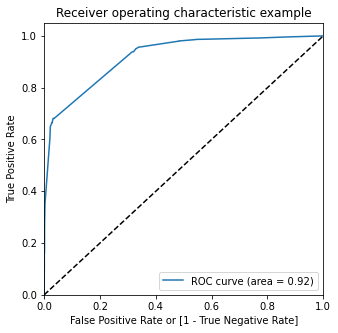

In [87]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_prob)

In [88]:
# Let's create columns with different probability cutoffs to find out optimum threshold cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,converted,converted_prob,lead_index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.005354,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.375188,6795,0,1,1,1,1,0,0,0,0,0,0
2,0,0.005354,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.062056,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.375188,3934,0,1,1,1,1,0,0,0,0,0,0


In [89]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

#TP = confusion_train[1,1] # true positive 
#TN = confusion_train[0,0] # true negatives
#FP = confusion_train[0,1] # false positives
#FN = confusion_train[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.747372  0.964315  0.613693
0.2   0.2  0.774273  0.956610  0.661919
0.3   0.3  0.781385  0.938767  0.684408
0.4   0.4  0.856215  0.681265  0.964018
0.5   0.5  0.857916  0.681265  0.966767
0.6   0.6  0.858689  0.681265  0.968016
0.7   0.7  0.855133  0.667478  0.970765
0.8   0.8  0.854669  0.665045  0.971514
0.9   0.9  0.750773  0.350770  0.997251


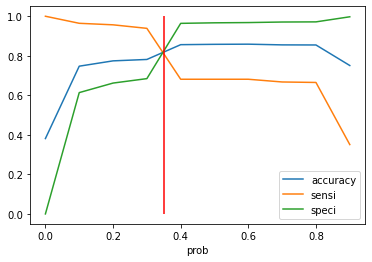

In [90]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(0.35, 1, 0, color='red')
plt.show()

__We choose probability cutoff at optimum level of 0.35__

* __As we increase the probability threshold the sensitivity drops and specificity increases which indicates that True positive(converted leads) correctly Predicted decreases over actual positives but at the same time predicted true negatives(non converted leads) predicted increases out of total true negatives, so we choose the optimum cutoff at 0.35__

In [91]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,converted,converted_prob,lead_index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.005354,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.375188,6795,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.005354,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.062056,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.375188,3934,0,1,1,1,1,0,0,0,0,0,0,1


In [92]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
print(confusion2)

[[2739 1263]
 [ 151 2315]]


In [93]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [94]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.final_predicted)

0.7813852813852814

In [95]:
print(metrics.recall_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.681265206812652


In [96]:
print(metrics.f1_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.7852301939705538


In [97]:
print(metrics.precision_score(y_train_pred_final.converted, y_train_pred_final.predicted))

0.9266409266409267


In [98]:
# specificity: Predicted number of leads as non converted out of total non converted
TN / float(TN+FP)

0.684407796101949

In [99]:
# false postive rate : predicted the number of lead as converted when lead did not have converted
print(FP/ float(TN+FP))

0.315592203898051


In [100]:
# positive predictive value - Total positive correctly predicted / total positive predicted
print (TP / float(TP+FP))

0.6470095025153717


__Precision and Recall Curve - for a second view on threshold__

In [101]:
from sklearn.metrics import precision_recall_curve

In [102]:
pre, recal,thresholds =  precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.converted_prob)

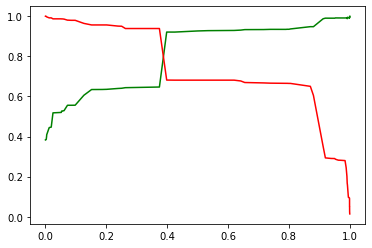

In [103]:
plt.plot(thresholds, pre[:-1], "g-")
plt.plot(thresholds, recal[:-1], "r-")
plt.show()

__We choose probability cutoff at optimum level of 0.4__

### Second view for optimum threshold cutoff 
* __As we increase the threshold the precision improves whereas recall drops which indicates that for lower thresholds non converted will also shown as converted which the company do not want so the company may like to go for higher precision but at the same time when threshold is high leads which are actual converted may not be detected, so we have to maintain a tradeoff and we choose the optimal cutoff as 0.4__

* __With this second view The threshold is at 0.4 as compared to 0.35 with sensitivity vs specificity view__



In [104]:
y_train_pred_final['Score'] = y_train_pred_final.converted_prob*100

In [105]:
y_train_pred_final

,converted,converted_prob,lead_index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Score
0,0,0.005354,1871,0,1,0,0,0,0,0,0,0,0,0,0,0.535355
1,0,0.375188,6795,0,1,1,1,1,0,0,0,0,0,0,1,37.518844
2,0,0.005354,3516,0,1,0,0,0,0,0,0,0,0,0,0,0.535355
3,0,0.062056,8105,0,1,0,0,0,0,0,0,0,0,0,0,6.205559
4,0,0.375188,3934,0,1,1,1,1,0,0,0,0,0,0,1,37.518844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,1,0.870530,350,1,1,1,1,1,1,1,1,1,1,0,1,87.053050
6464,1,0.991508,79,1,1,1,1,1,1,1,1,1,1,1,1,99.150811
6465,1,0.375188,8039,0,1,1,1,1,0,0,0,0,0,0,1,37.518844
6466,0,0.020198,6936,0,1,0,0,0,0,0,0,0,0,0,0,2.019793


In [106]:
X_test = X_test[col]

In [107]:
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent
4269,0,0,0,0,0,0,0,0,1,0,0,0,1
2376,0,1,0,0,0,0,0,0,1,0,0,0,1
7766,0,0,0,1,0,0,0,0,1,0,0,0,0
9199,0,0,1,0,0,0,0,0,0,0,0,0,0
4359,0,1,0,0,0,0,0,0,1,0,0,0,0


We are not doing the scaling for the columns of X_test ['TotalVisits','Total Time Spent on Website','Page Views Per Visit'] as these are essentially dropped from col

In [108]:
X_test_sm = sm.add_constant(X_test)

In [109]:
y_test_pred = logit_model3.predict(X_test_sm)

In [110]:
y_test_pred

4269    0.880686
2376    0.988046
7766    0.912491
9199    0.003745
4359    0.870530
          ...   
8649    0.375188
2152    0.988046
7101    0.020198
5331    0.127378
2960    0.988046
Length: 2772, dtype: float64

In [111]:
y_test_pred = pd.DataFrame(y_test_pred)

In [112]:
y_test_pred['converted'] = y_test.values

In [113]:
y_test_pred['lead_index'] = y_test_pred.index

In [114]:
y_test_pred

,0,converted,lead_index
4269,0.880686,1,4269
2376,0.988046,1,2376
7766,0.912491,1,7766
9199,0.003745,0,9199
4359,0.870530,1,4359
...,...,...,...
8649,0.375188,0,8649
2152,0.988046,1,2152
7101,0.020198,0,7101
5331,0.127378,0,5331


In [115]:
y_test_pred = y_test_pred.rename(columns = {0:'Converted_prob'})

In [116]:
y_test_pred['final_predicted'] = y_test_pred.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [117]:
y_test_pred

,Converted_prob,converted,lead_index,final_predicted
4269,0.880686,1,4269,1
2376,0.988046,1,2376,1
7766,0.912491,1,7766,1
9199,0.003745,0,9199,0
4359,0.870530,1,4359,1
...,...,...,...,...
8649,0.375188,0,8649,1
2152,0.988046,1,2152,1
7101,0.020198,0,7101,0
5331,0.127378,0,5331,0


In [118]:
# Confusion matrix 
confusion_test = metrics.confusion_matrix(y_test_pred.converted,y_test_pred.final_predicted)
print(confusion_test)

[[1132  545]
 [  57 1038]]


In [119]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred.converted, y_test_pred.final_predicted)

0.7828282828282829

In [120]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [121]:
print(metrics.recall_score(y_test_pred.converted, y_test_pred.final_predicted))

0.947945205479452


In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.6750149075730472

In [123]:
# false postive rate : predicted the number of lead as converted when lead did not have converted
print(FP/ float(TN+FP))

0.3249850924269529


In [124]:
print(metrics.precision_score(y_test_pred.converted, y_test_pred.final_predicted))

0.6557169930511687


In [125]:
y_test_pred['Score'] = y_test_pred['Converted_prob']*100

In [126]:
y_test_pred

,Converted_prob,converted,lead_index,final_predicted,Score
4269,0.880686,1,4269,1,88.068641
2376,0.988046,1,2376,1,98.804555
7766,0.912491,1,7766,1,91.249101
9199,0.003745,0,9199,0,0.374512
4359,0.870530,1,4359,1,87.053050
...,...,...,...,...,...
8649,0.375188,0,8649,1,37.518844
2152,0.988046,1,2152,1,98.804555
7101,0.020198,0,7101,0,2.019793
5331,0.127378,0,5331,0,12.737758


### Step 7: Lead Scoring

In [127]:
test_df = pd.DataFrame(y_test_pred[['lead_index','Score']])

In [128]:
test_df

,lead_index,Score
4269,4269,88.068641
2376,2376,98.804555
7766,7766,91.249101
9199,9199,0.374512
4359,4359,87.053050
...,...,...
8649,8649,37.518844
2152,2152,98.804555
7101,7101,2.019793
5331,5331,12.737758


In [129]:
train_df = pd.DataFrame(y_train_pred_final[['lead_index','Score']])

In [130]:
train_df

,lead_index,Score
0,1871,0.535355
1,6795,37.518844
2,3516,0.535355
3,8105,6.205559
4,3934,37.518844
...,...,...
6463,350,87.053050
6464,79,99.150811
6465,8039,37.518844
6466,6936,2.019793


### Hot Leads

In [131]:
Final_train = train_df[train_df['Score']>80]
Final_train

,lead_index,Score
5,4844,99.225863
7,8071,99.995091
9,7423,88.068641
10,1032,88.068641
11,6542,88.068641
...,...,...
6459,802,87.053050
6460,5646,99.914818
6462,4149,99.914818
6463,350,87.053050


In [132]:
Final_test = test_df[test_df['Score']>80]
Final_test

,lead_index,Score
4269,4269,88.068641
2376,2376,98.804555
7766,7766,91.249101
4359,4359,87.053050
9186,9186,88.068641
...,...,...
6649,6649,88.068641
3820,3820,99.054397
3118,3118,88.068641
2152,2152,98.804555


### Potential Leads - Lead Score > 35 - Predicted as converted by model

In [133]:
Final_train_potential = train_df[train_df['Score']>35]
Final_train_potential

,lead_index,Score
1,6795,37.518844
4,3934,37.518844
5,4844,99.225863
7,8071,99.995091
8,987,37.518844
...,...,...
6462,4149,99.914818
6463,350,87.053050
6464,79,99.150811
6465,8039,37.518844


### Potential Leads - Lead Score > 35 - Predicted as converted by model

In [134]:
Final_test_potential = test_df[test_df['Score']>35]
Final_test_potential

,lead_index,Score
4269,4269,88.068641
2376,2376,98.804555
7766,7766,91.249101
4359,4359,87.053050
9186,9186,88.068641
...,...,...
621,621,37.518844
3118,3118,88.068641
8649,8649,37.518844
2152,2152,98.804555
